# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type

total_rides_city_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
# 2. Get the total drivers for each city type

total_drivers_city_type=pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_city_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [10]:
#  3. Get the total amount of fares for each city type

total_fares_city_type=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
#  4. Get the average fare per ride for each city type. 

average_fare_ride_city_type=total_fares_city_type/total_rides_city_type
average_fare_ride_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [12]:
# 5. Get the average fare per driver for each city type. 

average_fare_driver_city_type=total_fares_city_type/total_drivers_city_type
average_fare_driver_city_type

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [17]:
# 6. Create a PyBer summary DataFrame.

pyber_summary_df={"total rides":total_rides_city_type,
                 "total drivers":total_drivers_city_type,
                 "total amount fares":total_fares_city_type,
                 "average fares per ride":average_fare_ride_city_type,
                 "average fares per driver":average_fare_driver_city_type}
pyber_summary_dataframe=pd.DataFrame(pyber_summary_df)
pyber_summary_dataframe

,total rides,total drivers,total amount fares,average fares per ride,average fares per driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [18]:
#  7. Cleaning up the DataFrame. Delete the index name

pyber_summary_dataframe.index.name = None

In [20]:
#  8. Format the columns.
pyber_summary_dataframe['total rides'] = pyber_summary_dataframe['total rides'].map('{:,}'.format)
pyber_summary_dataframe['Total Drivers'] = pyber_summary_dataframe['total drivers'].map('{:,}'.format)
pyber_summary_dataframe['total amount fares'] = pyber_summary_dataframe['total amount fares'].map('${:,.2f}'.format)
pyber_summary_dataframe['average fares per ride'] = pyber_summary_dataframe['average fares per ride'].map('${:,.2f}'.format)
pyber_summary_dataframe['average fares per driver'] = pyber_summary_dataframe['average fares per driver'].map('${:,.2f}'.format)

pyber_summary_dataframe

,total rides,total drivers,total amount fares,average fares per ride,average fares per driver,Total Drivers
Rural,125,537,"$4,327.93",$34.62,$8.06,537
Suburban,625,8570,"$19,356.33",$30.97,$2.26,"8,570"
Urban,"1,625",59602,"$39,854.38",$24.53,$0.67,"59,602"


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [21]:
# 1. Read the merged DataFrame

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [22]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_of_the_fares_typedate_df=pyber_data_df.groupby(["type","date"]).sum()
sum_of_the_fares_typedate_df

fare        ride_id  driver_count
type  date                                                   
Rural 2019-01-01 09:45:36  43.69  2424875833354             1
      2019-01-02 11:18:32  52.12  3454018971635             1
      2019-01-03 19:51:01  19.90  5559509612597             8
      2019-01-04 03:31:26  24.88  4195619112933             8
      2019-01-06 07:38:40  47.33  3849747342021             4
...                          ...            ...           ...
Urban 2019-05-08 04:20:00  21.99   117997692054            52
      2019-05-08 04:39:49  18.45  1811574736337            11
      2019-05-08 07:29:01  18.55  5682021476085            33
      2019-05-08 11:38:35  19.77  7837163332630             4
      2019-05-08 13:10:18  18.04  5616262558026            58

[2375 rows x 3 columns]

In [25]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

sum_of_the_fares_typedate_df=sum_of_the_fares_typedate_df.reset_index()
sum_of_the_fares_typedate_df

,index,type,date,fare,ride_id,driver_count
0,0,Rural,2019-01-01 09:45:36,43.69,2424875833354,1
1,1,Rural,2019-01-02 11:18:32,52.12,3454018971635,1
2,2,Rural,2019-01-03 19:51:01,19.90,5559509612597,8
3,3,Rural,2019-01-04 03:31:26,24.88,4195619112933,8
4,4,Rural,2019-01-06 07:38:40,47.33,3849747342021,4
...,...,...,...,...,...,...
2370,2370,Urban,2019-05-08 04:20:00,21.99,117997692054,52
2371,2371,Urban,2019-05-08 04:39:49,18.45,1811574736337,11
2372,2372,Urban,2019-05-08 07:29:01,18.55,5682021476085,33
2373,2373,Urban,2019-05-08 11:38:35,19.77,7837163332630,4


In [27]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

sum_of_the_fares_typedate_df=sum_of_the_fares_typedate_df.pivot(index="date",columns="type",values="fare")
sum_of_the_fares_typedate_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [29]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

new_jan_apr_df=sum_of_the_fares_typedate_df.loc["2019-01-01":"2019-04-29"]
new_jan_apr_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [31]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

type(new_jan_apr_df.index)

new_jan_apr_df.index=pd.to_datetime(new_jan_apr_df.index)
new_jan_apr_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='date', length=2196, freq=None)

In [32]:
# 7. Check that the datatype for the index is datetime using df.info()

new_jan_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [33]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

new_jan_apr_df=new_jan_apr_df.resample("W").sum()
new_jan_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'Total Fare Jan-Apr')

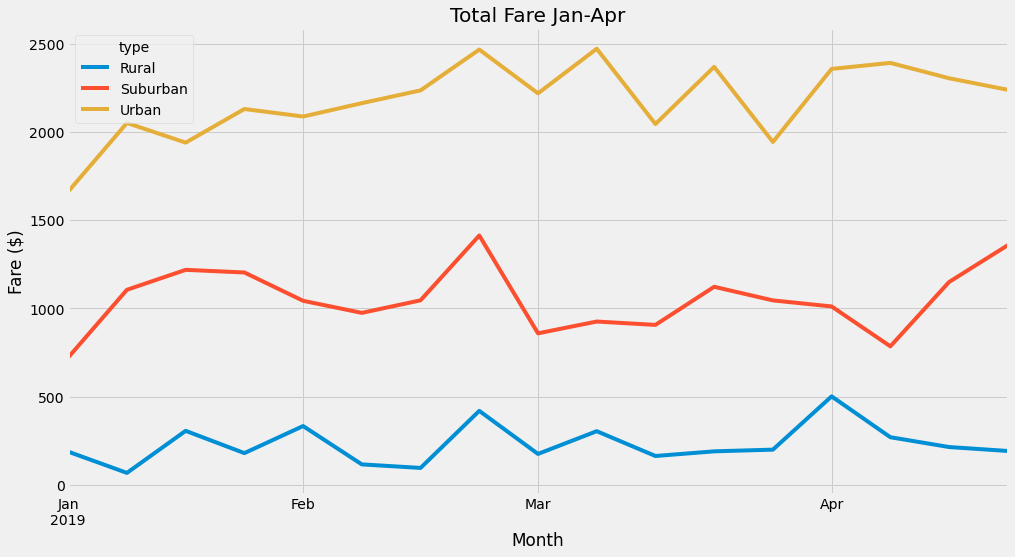

In [41]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')

new_jan_apr_df.plot(figsize=(15,8),)

plt.xlabel("Month")
plt.ylabel("Fare ($)")
plt.title("Total Fare Jan-Apr")